## Linear Regression

In [36]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
import seaborn as  sns

### Parameters


In [37]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

### Training Data


In [84]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]



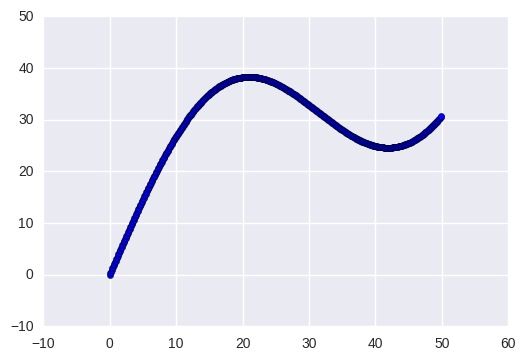

In [104]:
train_X= np.arange(50, step=.1)
train_Y = train_X + 20 * np.sin(train_X/10)
n_samples = train_X.shape[0]
plt.scatter(train_X,train_Y)


### TF Graph Input


In [105]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

### Set model weights


In [106]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

### Construct a linear model

In [107]:
pred = tf.add(tf.mul(X, W), b)

### Mean squared error

In [108]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

### Gradient descent

In [109]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Initializing the variables


In [110]:
init = tf.initialize_all_variables()

### Launch the graph


Epoch: 0050 cost= 119.183013916 W= 0.549537 b= 2.14264
Epoch: 0100 cost= 106.786155701 W= 0.512034 b= 3.92934
Epoch: 0150 cost= 96.488281250 W= 0.478245 b= 5.53906
Epoch: 0200 cost= 87.917175293 W= 0.447802 b= 6.9894
Epoch: 0250 cost= 80.769096375 W= 0.420375 b= 8.29607
Epoch: 0300 cost= 74.794769287 W= 0.395664 b= 9.47334
Epoch: 0350 cost= 69.789558411 W= 0.373397 b= 10.5342
Epoch: 0400 cost= 65.587745667 W= 0.353338 b= 11.4898
Epoch: 0450 cost= 62.051357269 W= 0.335266 b= 12.3508
Epoch: 0500 cost= 59.067363739 W= 0.318984 b= 13.1265
Epoch: 0550 cost= 56.543106079 W= 0.304314 b= 13.8254
Epoch: 0600 cost= 54.402202606 W= 0.291097 b= 14.4551
Epoch: 0650 cost= 52.581665039 W= 0.27919 b= 15.0223
Epoch: 0700 cost= 51.028816223 W= 0.26846 b= 15.5336
Epoch: 0750 cost= 49.701374054 W= 0.258794 b= 15.994
Epoch: 0800 cost= 48.563743591 W= 0.25009 b= 16.4087
Epoch: 0850 cost= 47.584323883 W= 0.242236 b= 16.7829
Epoch: 0900 cost= 46.741359711 W= 0.235171 b= 17.1195
Epoch: 0950 cost= 46.012706757 

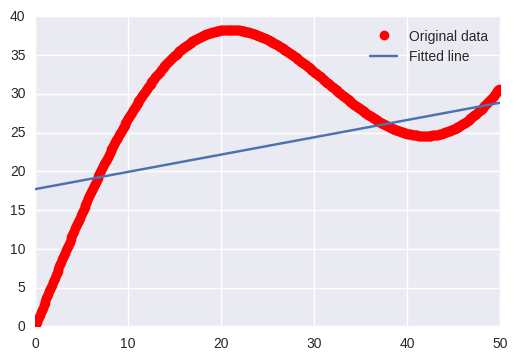

In [112]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print( "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print( "Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()